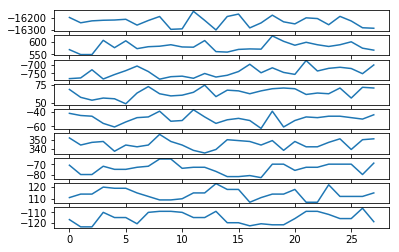

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import re

parser = re.compile('^.?MZ: (\d+); ac:\((-?\d+,-?\d+,-?\d+)\);'
                     ' g:\((-?\d+,-?\d+,-?\d+)\); mg:\((-?\d+,-?\d+,-?\d+)\).*$')

freq_parser = re.compile('^.?All ok; starting: \d+; freq: Hertz\((\d+)\).?$')

def match_to_tuple(string):
    parts = string.split(',')
    return (int(parts[0]), int(parts[1]), int(parts[2]))

log = []
freq = None

with open('log.txt', 'r', encoding='latin-1') as f:
    for line in f.readlines():
        r = freq_parser.search(line)
        if not r is None:
            freq = int(r.group(1))

        r = parser.search(line)
        if r is None:
            continue

        log.append((int(r.group(1)),
                    match_to_tuple(r.group(2)),
                    match_to_tuple(r.group(3)),
                    match_to_tuple(r.group(4))))

acc_x = list(map(lambda x: x[1][0], log))
acc_y = list(map(lambda x: x[1][1], log))
acc_z = list(map(lambda x: x[1][2], log))

gyro_x = list(map(lambda x: x[2][0], log))
gyro_y = list(map(lambda x: x[2][1], log))
gyro_z = list(map(lambda x: x[2][2], log))

mag_x = list(map(lambda x: x[3][0], log))
mag_y = list(map(lambda x: x[3][1], log))
mag_z = list(map(lambda x: x[3][2], log))

f, axarr = plt.subplots(9, sharex=True)

axarr[0].plot(acc_x)
axarr[1].plot(acc_y)
axarr[2].plot(acc_z)
axarr[3].plot(gyro_x)
axarr[4].plot(gyro_y)
axarr[5].plot(gyro_z)
axarr[6].plot(mag_x)
axarr[7].plot(mag_y)
axarr[8].plot(mag_z)